# Normalization and Standardization

[Normalization](https://en.wikipedia.org/wiki/Normalization_(statistics)) makes data more meaningful by converting absolute values into comparisons with related values.  [Chris Vallier](https://github.com/jcvall) has produced this demonstration of normalization using PyJanitor.

pyjanitor functions demonstrated here:

- [min_max_scale](../reference/functions.html#janitor.functions.min_max_scale)

- [transform_column](../reference/functions.html#janitor.functions.transform_column)

In [2]:
import janitor
import pandas as pd
import numpy as np
import seaborn as sns
sns.set(style="whitegrid")

## Load data

We'll use a dataset with fuel efficiency in miles per gallon ("mpg"), engine displacement in cubic centimeters ("disp"), and horsepower ("hp") for a variety of car models.  It's a crazy, but customary, mix of units.

In [4]:
csv_file = (
    'https://gist.githubusercontent.com/seankross/a412dfbd88b3db70b74b/raw/5f23f993cd87c283ce766e7ac6b329ee7cc2e1d1/mtcars.csv'
)
cars_df = pd.read_csv(csv_file)

Quantities without units are dangerous, so let's use pyjanitor's `rename_column`...

In [5]:
cars_df = cars_df.rename_column('disp', 'disp_cc')

## Examine raw data

In [6]:
cars_df.head()

,model,mpg,cyl,disp_cc,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


### Visualize

Each value makes more sense viewed in comparison to the other models.  We'll use simple [Seaborn](https://seaborn.pydata.org/) bar plots.

### mpg by model

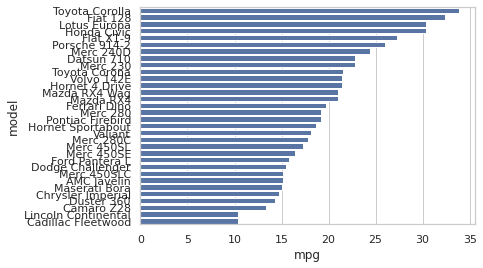

In [7]:
cars_df = cars_df.sort_values('mpg', ascending=False)
sns.barplot(y='model', x='mpg', data=cars_df, color='b', orient="h", )

### displacement by model

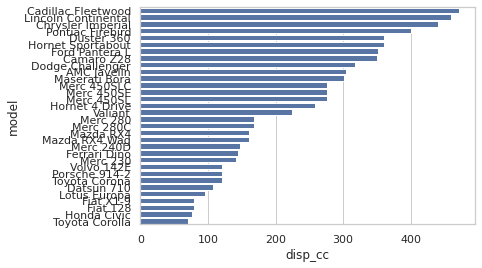

In [8]:
cars_df = cars_df.sort_values('disp_cc', ascending=False)
sns.barplot(y='model', x='disp_cc', data=cars_df, color='b', orient="h")

### horsepower by model

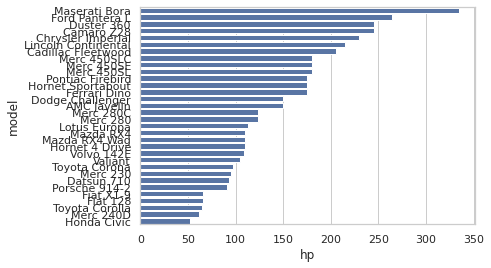

In [9]:
cars_df = cars_df.sort_values('hp', ascending=False)
sns.barplot(y='model', x='hp', data=cars_df, color='b', orient="h")

## [min-max normalization](https://en.wikipedia.org/wiki/Feature_scaling#Rescaling_\(min-max_normalization\))  

First we'll use pyjanitor's [min_max_scale](../reference/functions.html#janitor.functions.min_max_scale) to rescale the `mpg`, `disp_cc`, and `hp` columns in-place so that each value varies from 0 to 1.

In [10]:
(
    cars_df.min_max_scale(col_name='mpg', new_max=1, new_min=0)
    .min_max_scale(col_name='disp_cc', new_max=1, new_min=0)
    .min_max_scale(col_name='hp', new_max=1, new_min=0)
)

,model,mpg,cyl,disp_cc,hp,drat,wt,qsec,vs,am,gear,carb
30,Maserati Bora,0.195745,8,0.573460,1.000000,3.54,3.570,14.60,0,1,5,8
28,Ford Pantera L,0.229787,8,0.698179,0.749117,4.22,3.170,14.50,0,1,5,4
6,Duster 360,0.165957,8,0.720629,0.681979,3.21,3.570,15.84,0,0,3,4
23,Camaro Z28,0.123404,8,0.695685,0.681979,3.73,3.840,15.41,0,0,3,4
16,Chrysler Imperial,0.182979,8,0.920180,0.628975,3.23,5.345,17.42,0,0,3,4
15,Lincoln Continental,0.000000,8,0.970067,0.575972,3.00,5.424,17.82,0,0,3,4
14,Cadillac Fleetwood,0.000000,8,1.000000,0.540636,2.93,5.250,17.98,0,0,3,4
13,Merc 450SLC,0.204255,8,0.510601,0.452297,3.07,3.780,18.00,0,0,3,3
11,Merc 450SE,0.255319,8,0.510601,0.452297,3.07,4.070,17.40,0,0,3,3
12,Merc 450SL,0.293617,8,0.510601,0.452297,3.07,3.730,17.60,0,0,3,3


The shapes of the bar graphs remain the same, but the horizontal axes show the new scale.

### mpg (min-max normalized)

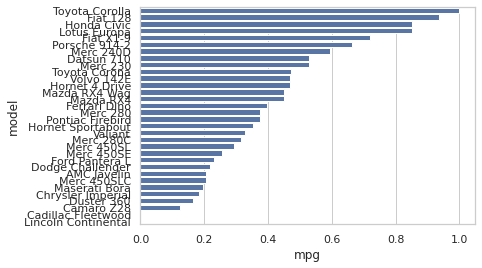

In [11]:
cars_df = cars_df.sort_values('mpg', ascending=False)
sns.barplot(y='model', x='mpg', data=cars_df, color='b', orient="h")

### displacement (min-max normalized)

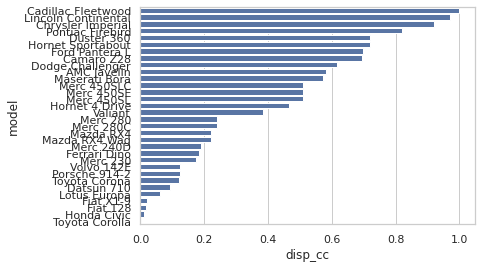

In [12]:
cars_df = cars_df.sort_values('disp_cc', ascending=False)
sns.barplot(y='model', x='disp_cc', data=cars_df, color='b', orient="h")

### horsepower (min-max normalized)

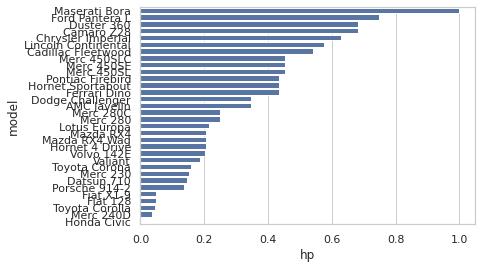

In [13]:
cars_df = cars_df.sort_values('hp', ascending=False)
sns.barplot(y='model', x='hp', data=cars_df, color='b', orient="h")

## Standardization (z-score)

Next we'll convert to [standard scores](https://en.wikipedia.org/wiki/Standard_score).  This expresses each value in terms of its standard deviations from the mean, expressing where each model stands in relation to the others.

We'll use pyjanitor's [transform_columns](../reference/functions.html#janitor.functions.transform_columns) to apply the standard score calculation, `(x - x.mean()) / x.std()`, to each value in each of the columns we're evaluating.

In [14]:
cars_df.transform_columns(
    ['mpg', 'disp_cc', 'hp'],
    lambda x: (x - x.mean()) / x.std(),
    elementwise=False
)

,model,mpg,cyl,disp_cc,hp,drat,wt,qsec,vs,am,gear,carb
30,Maserati Bora,-0.844644,8,0.567039,2.746567,3.54,3.570,14.60,0,1,5,8
28,Ford Pantera L,-0.711907,8,0.970465,1.711021,4.22,3.170,14.50,0,1,5,4
6,Duster 360,-0.960789,8,1.043081,1.433903,3.21,3.570,15.84,0,0,3,4
23,Camaro Z28,-1.126710,8,0.962396,1.433903,3.73,3.840,15.41,0,0,3,4
16,Chrysler Imperial,-0.894420,8,1.688562,1.215126,3.23,5.345,17.42,0,0,3,4
15,Lincoln Continental,-1.607883,8,1.849932,0.996348,3.00,5.424,17.82,0,0,3,4
14,Cadillac Fleetwood,-1.607883,8,1.946754,0.850497,2.93,5.250,17.98,0,0,3,4
13,Merc 450SLC,-0.811460,8,0.363713,0.485868,3.07,3.780,18.00,0,0,3,3
11,Merc 450SE,-0.612354,8,0.363713,0.485868,3.07,4.070,17.40,0,0,3,3
12,Merc 450SL,-0.463025,8,0.363713,0.485868,3.07,3.730,17.60,0,0,3,3


### Standardized mpg

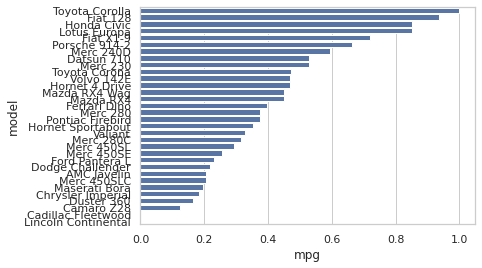

In [15]:
cars_df = cars_df.sort_values('mpg', ascending=False)
sns.barplot(y='model', x='mpg', data=cars_df, color='b', orient="h", )

### Standardized displacement

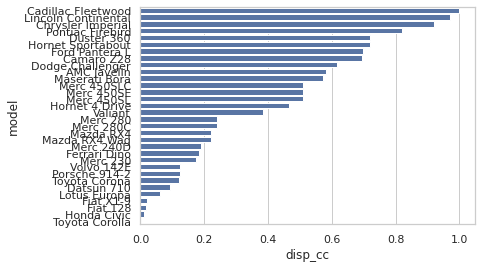

In [16]:
cars_df = cars_df.sort_values('disp_cc', ascending=False)
sns.barplot(y='model', x='disp_cc', data=cars_df, color='b', orient="h")

### Standardized horsepower

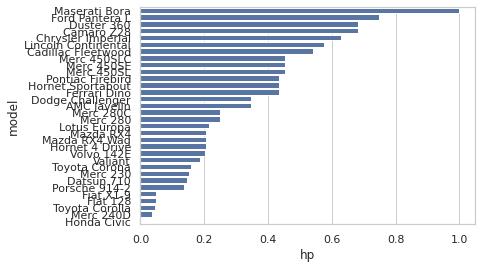

In [17]:
cars_df = cars_df.sort_values('hp', ascending=False)
sns.barplot(y='model', x='hp', data=cars_df, color='b', orient="h")